In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read all data 
A = pd.read_html('Report16Jul2021121540.html')
#A

In [3]:
# choosing the data that we will use 
A1=A[11]
#A1

In [4]:
# changing the first row to be a header for all data
new_header1 = A1.iloc[0] #grab the first row for the header
A2 = A1[365:514] #take the data less the header row
A2.columns = new_header1 #set the header row as the df header
A2 = A2.reset_index(drop=True) #reseting indexes
#A2

In [5]:
Indicator = A2.copy()
Indicator

,Date,High,Low,Open,Close,Volume,InterestYield,CapitalPaymentYield,TotalDistributionYield,EY,P/E,DY
0,31 Jan 2020,11748,11426,11460,11604,1624680,0.00,0.00,0.00,10.58,9.45,0.00
1,30 Jan 2020,11784,11325,11450,11714,811973,0.00,0.00,0.00,10.48,9.54,0.00
2,29 Jan 2020,11669,11296,11431,11499,716184,0.00,0.00,0.00,10.68,9.37,0.00
3,28 Jan 2020,11699,11329,11635,11541,725082,0.00,0.00,0.00,10.64,9.40,0.00
4,27 Jan 2020,11766,11400,11505,11630,591011,0.00,0.00,0.00,10.56,9.47,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
144,05 Jul 2019,10289,9662,10101,9964,3938046,0.00,0.00,2.53,13.50,7.41,2.53
145,04 Jul 2019,10476,10202,10320,10476,813494,0.00,0.00,2.41,12.84,7.79,2.41
146,03 Jul 2019,10324,10064,10205,10324,775221,0.00,0.00,2.44,13.03,7.68,2.44
147,02 Jul 2019,10538,10069,10500,10298,886286,0.00,0.00,2.45,13.06,7.66,2.45


In [6]:
Indicator['Date'] = pd.to_datetime(Indicator.Date) #changing date format
Indicator

,Date,High,Low,Open,Close,Volume,InterestYield,CapitalPaymentYield,TotalDistributionYield,EY,P/E,DY
0,2020-01-31,11748,11426,11460,11604,1624680,0.00,0.00,0.00,10.58,9.45,0.00
1,2020-01-30,11784,11325,11450,11714,811973,0.00,0.00,0.00,10.48,9.54,0.00
2,2020-01-29,11669,11296,11431,11499,716184,0.00,0.00,0.00,10.68,9.37,0.00
3,2020-01-28,11699,11329,11635,11541,725082,0.00,0.00,0.00,10.64,9.40,0.00
4,2020-01-27,11766,11400,11505,11630,591011,0.00,0.00,0.00,10.56,9.47,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
144,2019-07-05,10289,9662,10101,9964,3938046,0.00,0.00,2.53,13.50,7.41,2.53
145,2019-07-04,10476,10202,10320,10476,813494,0.00,0.00,2.41,12.84,7.79,2.41
146,2019-07-03,10324,10064,10205,10324,775221,0.00,0.00,2.44,13.03,7.68,2.44
147,2019-07-02,10538,10069,10500,10298,886286,0.00,0.00,2.45,13.06,7.66,2.45


In [7]:
#making all digits to be float for calculation
Indicator['High']=Indicator.High.astype('float')
Indicator['Close']=Indicator.Close.astype('float')
Indicator['Low']=Indicator.Low.astype('float')
Indicator['Open']=Indicator.Open.astype('float')

In [8]:
#deleting columns not neccessary fot indicator calculation
del Indicator['Volume'],Indicator['TotalDistributionYield'], Indicator['InterestYield'], Indicator['CapitalPaymentYield'], Indicator['EY'], Indicator['DY'], Indicator['P/E']
#Indicator

In [9]:
#descriptive statistics
Indicator["Close"].describe()

count      149.000000
mean     10180.832215
std       1581.101734
min       6500.000000
25%       9000.000000
50%      10476.000000
75%      11630.000000
max      12490.000000
Name: Close, dtype: float64

In [10]:
def RSI(value):
    '''
    The function calculates the relative strength index parameters 
    to be used to calculate 14_day rsi values
    '''
    up = value[value>0].mean()
    down = -value[value<0].mean()
    return (100 * up / (up + down))

Indicator['Direction'] = (Indicator['Close'] - Indicator['Close'].shift(1)) #adding momentum
Indicator['RSI_14D'] = Indicator['Direction'].rolling(center=False, window=14).apply(RSI) #14D RSI

In [11]:
#Indicator['RSI_14D']

In [12]:
l = []
for i in range (len(Indicator)):
    if Indicator['RSI_14D'][i] >= 28 and Indicator['RSI_14D'][i] <= 30: #values in this range satisfy a buy condition
        l.append(1) #buy
    elif Indicator['RSI_14D'][i] >= 31 and Indicator['RSI_14D'][i] <= 69:#values in this range satisfy a hold condition
        l.append(2) #hold
    elif Indicator['RSI_14D'][i] >= 70:#values in this range satisfy a sell condition
        l.append(3)#sell
    else:
        l.append(2) #hold signal
Indicator['RSI_sig'] = l

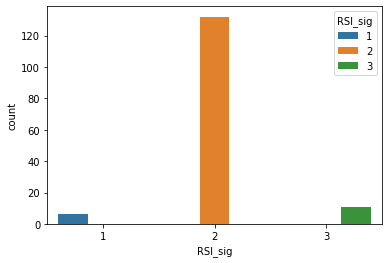

2    132
3     11
1      6
Name: RSI_sig, dtype: int64

In [13]:
sns.countplot(x = 'RSI_sig', data=pd.DataFrame(Indicator), hue='RSI_sig')#plotting signal frequency
plt.savefig("aspen_rsicount")
plt.show()
Indicator['RSI_sig'].value_counts() #counts according to signal code 

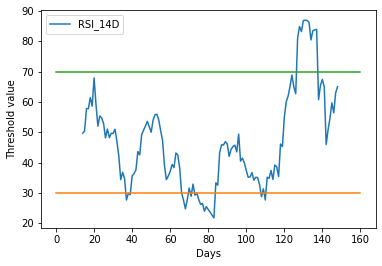

In [14]:
#plotting the indicator graphically
r = Indicator['RSI_14D']
h = [0,160]
b = [30,30]
f = plt.plot(r, label = 'RSI_14D')
e = [70,70]
g = plt.plot(h,b,h,e) + f
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("aspen_rsi")
plt.show(g)

In [15]:
n=21
Indicator['STOK'] = ((Indicator['Close'] - Indicator['Low'].rolling(window=n,center=False).mean()) /
                     (Indicator['High'].rolling(window=n, center=False).max() - 
                      Indicator['Low'].rolling(window=n, center=False).min())) * 100 #calculates%D stochastic
Indicator['STOD'] = Indicator['STOK'].rolling(window = 7, center=False).mean()  #%K stochastic 

In [16]:
m = []
for i in range (len(Indicator)):
    if Indicator['STOK'][i] >= 28 and Indicator['STOK'][i]<=30:#values in this range satisfy a buy condition
        m.append(1) #buy
    elif Indicator['STOK'][i] > 30 and Indicator['STOK'][i] <= 69:#values in this range satisfy a hold condition
        m.append(2) #sell    
    elif Indicator['STOK'][i] >= 70:#values in this range satisfy a sell condition
        m.append(3) #sell
    else:
        m.append(2) #hold
Indicator['STO_sig'] = m

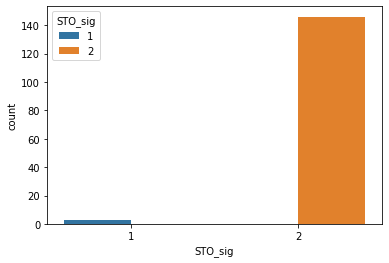

2    146
1      3
Name: STO_sig, dtype: int64

In [17]:
sns.countplot(x = 'STO_sig', data=pd.DataFrame(Indicator), hue='STO_sig')#plotting signal frequency
plt.savefig("aspen_stocount")
plt.show()
Indicator['STO_sig'].value_counts()#counts frequency values

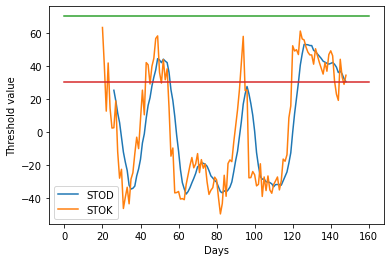

In [18]:
#plotting the indicator graphically
t = Indicator['STOD']
j = Indicator['STOK']
u = plt.plot(t, label = 'STOD')
s = plt.plot(j, label = 'STOK')
h = [0,160]
b = [30,30]
e = [70,70]
g = plt.plot(h,e,h,b) + u + s
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("aspen_sto")
plt.show()

In [19]:
Indicator['EMA_10'] = Indicator['Close'].ewm(span=10,adjust=False,min_periods=1).mean() #50day exponential ma
Indicator['EMA_30'] = Indicator['Close'].ewm(span=20,adjust=False,min_periods=1).mean() #100day exponential ma
Indicator['EMA_90'] = Indicator['Close'].ewm(span=90,adjust=False,min_periods=1).mean() #200day exponential ma

In [20]:
# append 1 for a buy, 0 for a sell and 2 for hold and NaN
n = []
for i in range (len(Indicator)):
    if Indicator['EMA_10'][i] < Indicator['EMA_30'][i] and Indicator['EMA_90'][i]:#values in this range satisfy a buy condition
        n.append(1) #buy
    elif Indicator['EMA_10'][i] > Indicator['EMA_30'][i] and Indicator['EMA_90'][i]:#values in this range satisfy a hold condition
        n.append(3) #sell
    elif Indicator['EMA_10'][i] == Indicator['EMA_30'][i] == Indicator['EMA_90'][i]:#values in this range satisfy a hold condition
        n.append(2)  #hold      
    else:
        n.append(2)#hold
Indicator['EMA_sig'] = n     

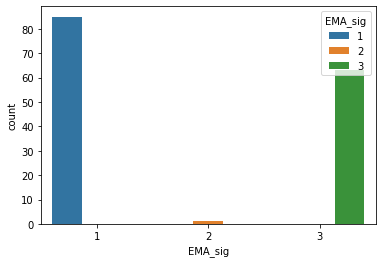

1    85
3    63
2     1
Name: EMA_sig, dtype: int64

In [21]:
sns.countplot(x = 'EMA_sig', data=pd.DataFrame(Indicator), hue='EMA_sig')#plotting signal frequency
plt.savefig("aspen_emacount")
plt.show()
Indicator['EMA_sig'].value_counts()#counts frequency values

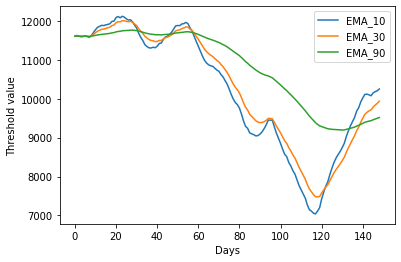

In [22]:
# buy if 10EMA line cuts the other two EMA lines from above and moves below both the EMAs
# sell if 10EMA line cuts the other two EMA lines from below and moves above both the EMAs
a = Indicator['EMA_10'] #10 day exponential moving average
b = Indicator['EMA_30'] #30 day exponential moving average
c = Indicator['EMA_90'] #90 day exponential moving average
d = plt.plot(a, label = 'EMA_10' ) + plt.plot(b, label = 'EMA_30') + plt.plot(c, label = 'EMA_90')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("aspen_ema")
plt.show(d)

In [23]:
Indicator['26_ema'] = Indicator['Close'].ewm(span=26,adjust=True,ignore_na=False).mean() #26day ema
Indicator['12_ema'] = Indicator['Close'].ewm(span=12,adjust=True,ignore_na=False).mean() #12day ema
Indicator['MACD'] = Indicator['12_ema'] - Indicator['26_ema'] #macd
Indicator['9EMA_MACD'] = Indicator['MACD'].ewm(span=9,adjust=True,ignore_na=False).mean() #9daymacd_ema
#Indicator

In [24]:
f = []
for i in range (len(Indicator)):
    if Indicator['MACD'][i] > Indicator['9EMA_MACD'][i]:#values in this range satisfy a buy condition
        f.append(1) #buy
    elif Indicator['MACD'][i] < Indicator['9EMA_MACD'][i]:#values in this range satisfy a hold condition
        f.append(3) #sell
    elif Indicator['MACD'][i] == Indicator['9EMA_MACD'][i]:#values in this range satisfy a sell condition
        f.append(2) #
    else:
        f.append(2)#hold
Indicator['MACD_sig'] = f 

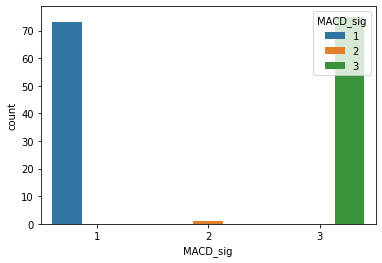

3    75
1    73
2     1
Name: MACD_sig, dtype: int64

In [25]:
sns.countplot(x = 'MACD_sig', data=pd.DataFrame(Indicator), hue='MACD_sig')#plotting signal frequency
plt.savefig("aspen_macdcount")
plt.show()
Indicator['MACD_sig'].value_counts()#counts frequency values

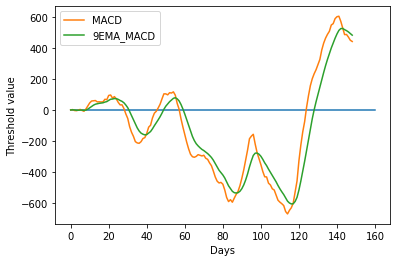

In [26]:
#plotting the indicator graphically
q = Indicator['9EMA_MACD']
e = Indicator['MACD']
z = [0,160]
x = [0,0]
r = plt.plot(z,x)+ plt.plot(e, label = 'MACD') +plt.plot(q, label = '9EMA_MACD')
plt.ylabel('Threshold value')
plt.xlabel('Days')
plt.legend()
plt.savefig("aspen_macd")
plt.show(r)

In [28]:
#changing from dataframe to array for easy adding
new1 = Indicator['RSI_sig'].to_numpy()
new2 = Indicator['MACD_sig'].to_numpy()
new3 = Indicator['EMA_sig'].to_numpy()
new4 = Indicator['STO_sig'].to_numpy()

In [29]:
b = []
for i in range (len(new2)):
    if new1[i] + new2[i] + new3[i] + new4[i] <= 6: #values in this range satisfy a buy condition
        b.append(1)
    elif new1[i] + new2[i] + new3[i] + new4[i] >=10:#values in this range satisfy a sell condition
        b.append(3)
    else:
        b.append(2) #hold
new5 = pd.Series(b)  
#new5

In [30]:
Indicator['Decision'] = new5
Indicator

,Date,High,Low,Open,Close,Direction,RSI_14D,RSI_sig,STOK,STOD,...,EMA_10,EMA_30,EMA_90,EMA_sig,26_ema,12_ema,MACD,9EMA_MACD,MACD_sig,Decision
0,2020-01-31,11748.0,11426.0,11460.0,11604.0,NaN,NaN,2,NaN,NaN,...,11604.000000,11604.000000,11604.000000,2,11604.000000,11604.000000,0.000000,0.000000,2,2
1,2020-01-30,11784.0,11325.0,11450.0,11714.0,110.0,NaN,2,NaN,NaN,...,11624.000000,11614.476190,11606.417582,3,11661.115385,11663.583333,2.467949,1.371083,1,2
2,2020-01-29,11669.0,11296.0,11431.0,11499.0,-215.0,NaN,2,NaN,NaN,...,11601.272727,11603.478458,11604.056756,1,11602.868901,11599.346420,-3.522481,-0.634476,3,2
3,2020-01-28,11699.0,11329.0,11635.0,11541.0,42.0,NaN,2,NaN,NaN,...,11590.314050,11597.528129,11602.670894,1,11585.573060,11580.928736,-4.644324,-1.992826,3,2
4,2020-01-27,11766.0,11400.0,11505.0,11630.0,89.0,NaN,2,NaN,NaN,...,11597.529677,11600.620688,11603.271533,1,11595.875851,11594.261223,-1.614628,-1.880320,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,2019-07-05,10289.0,9662.0,10101.0,9964.0,-58.0,54.698264,2,19.133652,35.947777,...,10074.254186,9711.346862,9434.759953,3,9523.795153,10010.392357,486.597204,518.484147,3,3
145,2019-07-04,10476.0,10202.0,10320.0,10476.0,512.0,59.745348,2,43.977303,36.979346,...,10147.298880,9784.170970,9457.644349,3,9594.329775,10082.024302,487.694527,512.326223,3,3
146,2019-07-03,10324.0,10064.0,10205.0,10324.0,-152.0,56.417796,2,33.201262,35.030983,...,10179.426356,9835.583259,9476.685133,3,9648.380082,10119.251333,470.871251,504.035228,3,3
147,2019-07-02,10538.0,10069.0,10500.0,10298.0,-26.0,63.088281,2,28.838017,32.137297,...,10200.985200,9879.622948,9494.736009,3,9696.500620,10146.751128,450.250508,493.278284,3,2


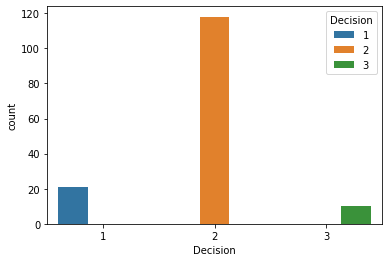

2    118
1     21
3     10
Name: Decision, dtype: int64

In [31]:
sns.countplot(x = 'Decision', data=pd.DataFrame(Indicator), hue='Decision')#plotting signal frequency
plt.savefig("aspen_dec")
plt.show()
Indicator['Decision'].value_counts()#counts frequency values

In [32]:
Indicator['Decision'].value_counts(normalize=True) * 100 #expresses frequency aas a percentage

2    79.194631
1    14.093960
3     6.711409
Name: Decision, dtype: float64